Import needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read Data

In [2]:
df = pd.read_csv("magic_gamma_telescope04_.csv")
df.head()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


EDA

In [3]:
dff = df.copy()

In [4]:
# get basic unsder standing of data
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   flength   19020 non-null  float64
 1   fwidth    19020 non-null  float64
 2   fsize     19020 non-null  float64
 3   fconc     19020 non-null  float64
 4   fconc1    19020 non-null  float64
 5   fsym      19020 non-null  float64
 6   fm3long   19020 non-null  float64
 7   fm3trans  19020 non-null  float64
 8   falpha    19020 non-null  float64
 9   dist      19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [5]:
dff.shape

(19020, 11)

In [6]:
dff.columns

Index(['flength', 'fwidth', 'fsize', 'fconc', 'fconc1', 'fsym', 'fm3long',
       'fm3trans', 'falpha', 'dist', 'class'],
      dtype='object')

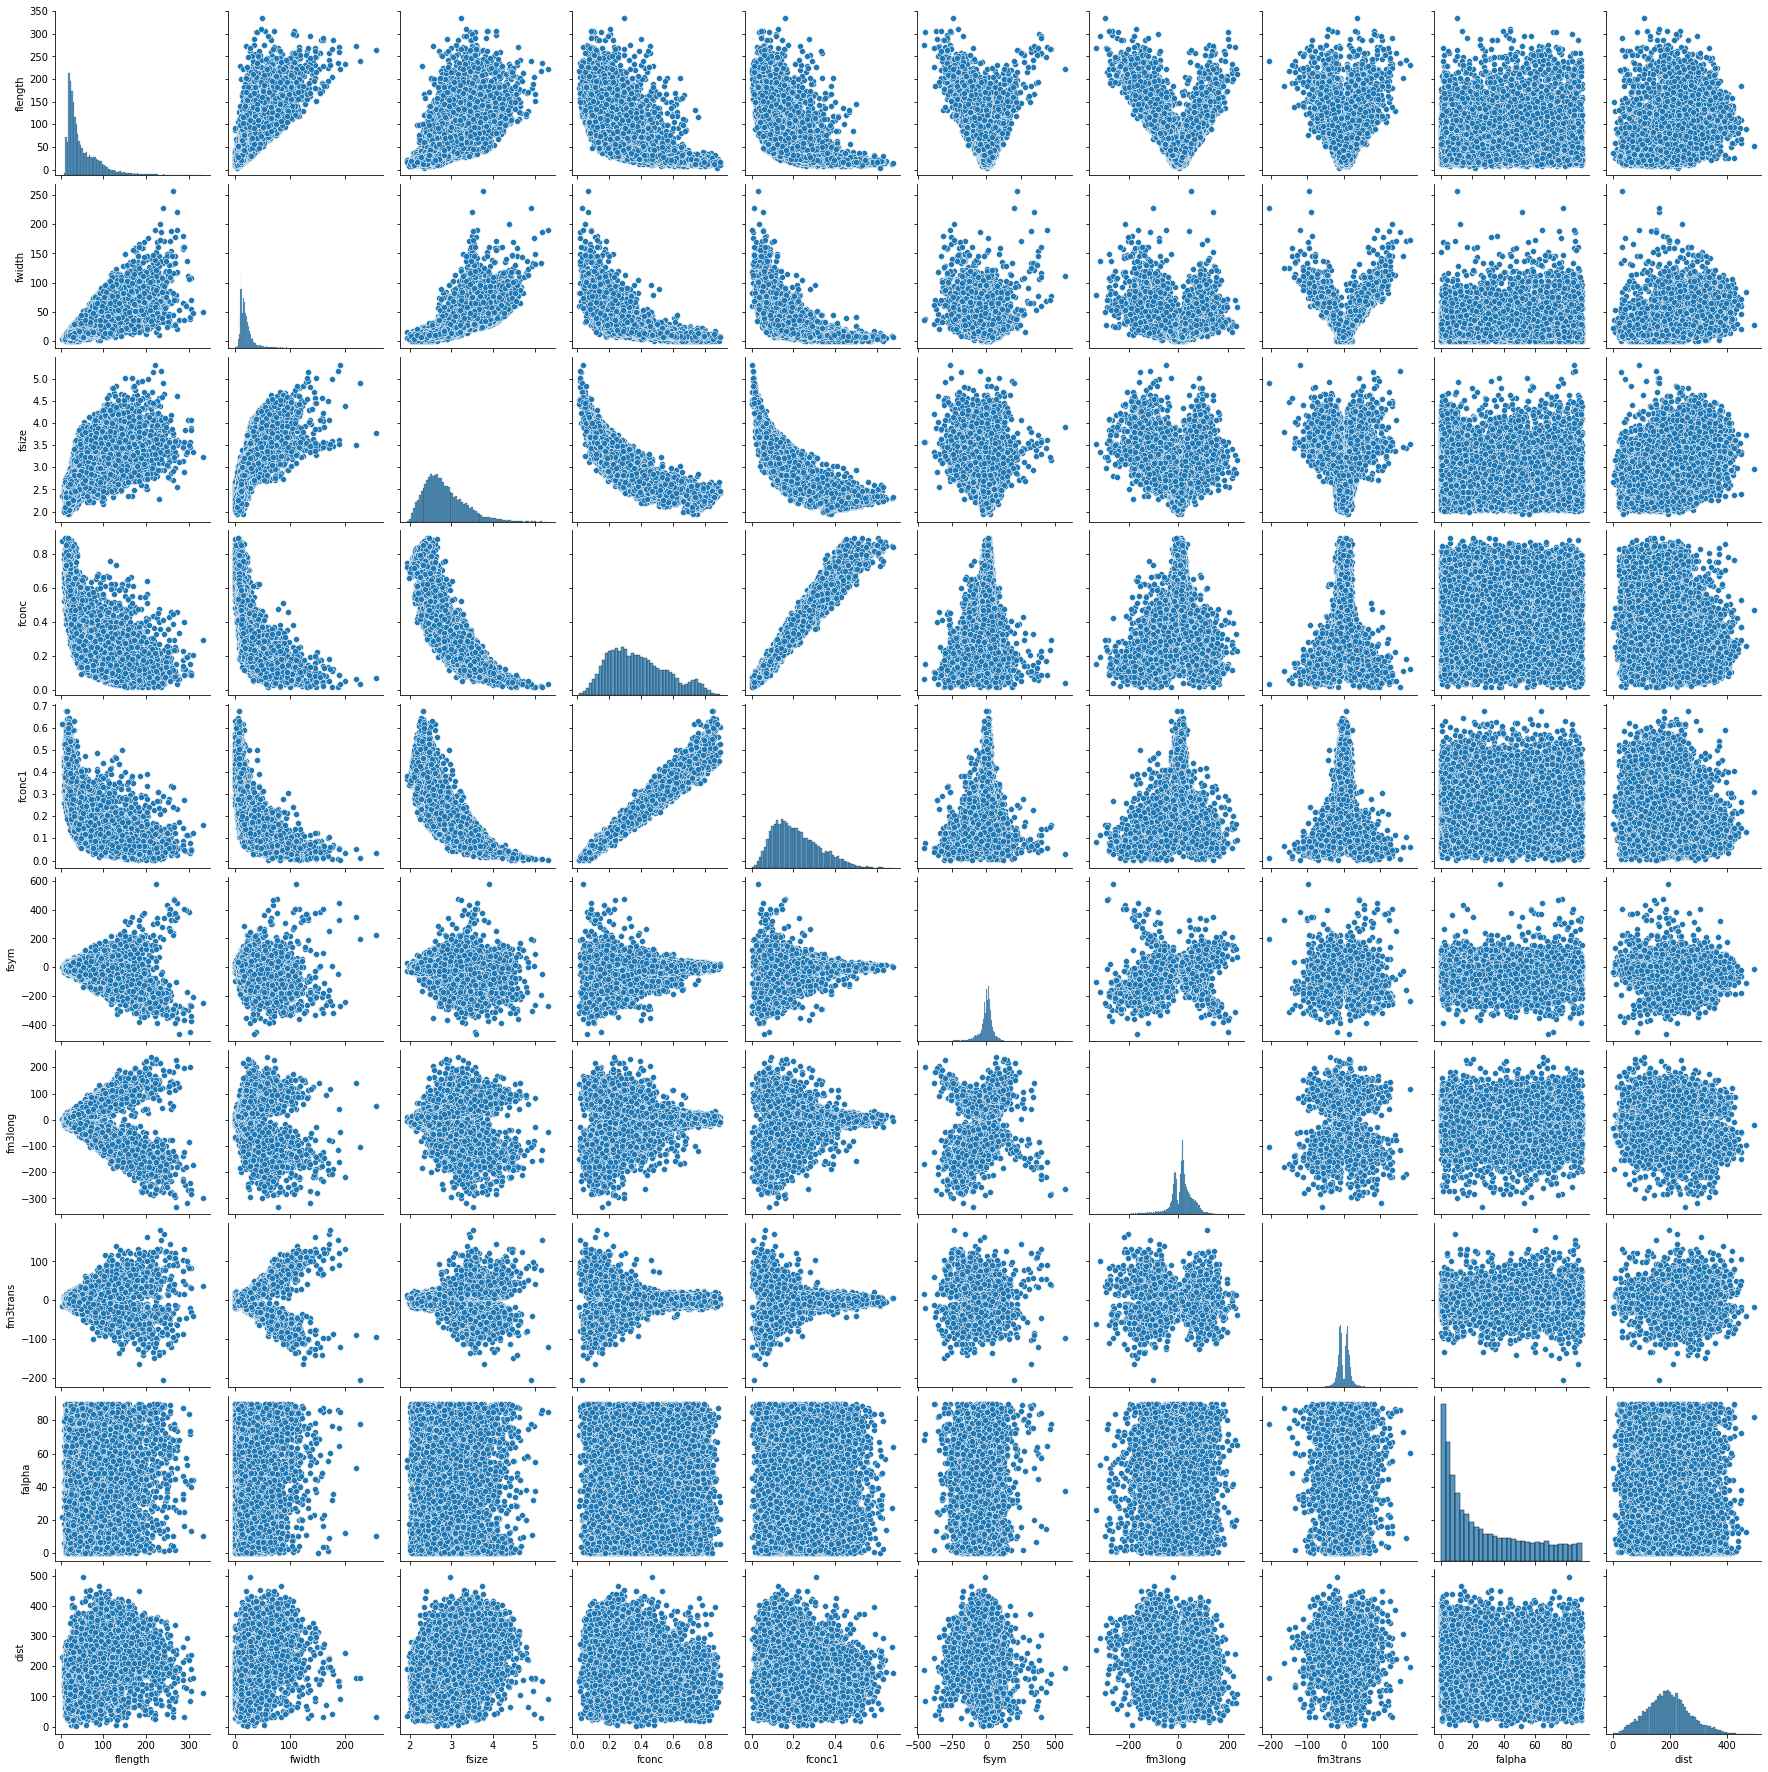

In [7]:
sns.pairplot(data = dff)

In [8]:
dff.describe()

,flength,fwidth,fsize,fconc,fconc1,fsym,fm3long,fm3trans,falpha,dist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [9]:
dff['class'].unique()

array(['g', 'h'], dtype=object)

In [10]:
dff['class'].replace({'g':1, 'h':0}, inplace =True)

In [11]:
dff['class'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:ylabel='Frequency'>

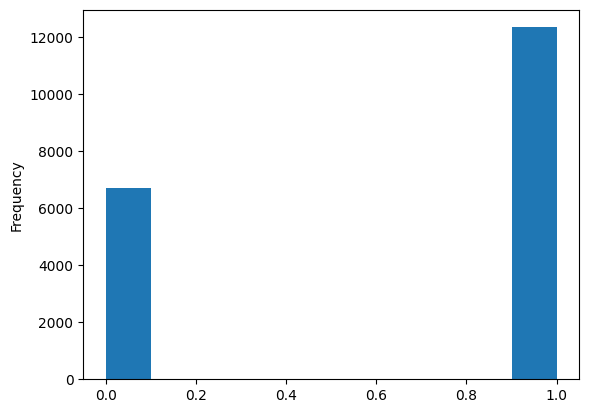

In [12]:
dff['class'].plot.hist()

<AxesSubplot:xlabel='class', ylabel='flength'>

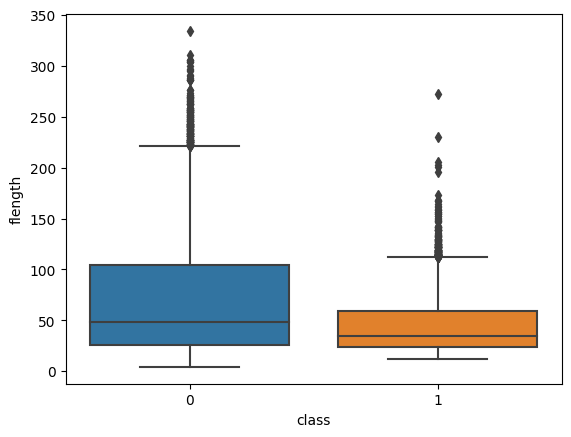

In [13]:
sns.boxplot(data=dff,x='class',y='flength')

<AxesSubplot:xlabel='class', ylabel='fwidth'>

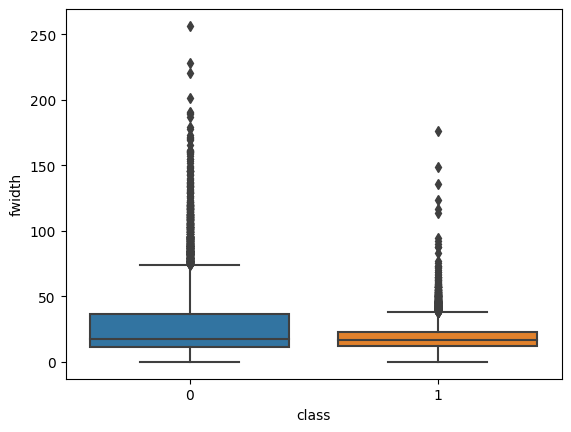

In [14]:
sns.boxplot(data=dff,x='class',y='fwidth')

<AxesSubplot:xlabel='class', ylabel='fsize'>

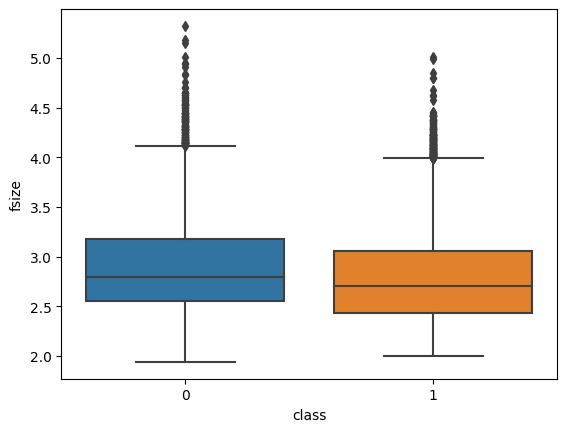

In [15]:
sns.boxplot(data=dff,x='class',y='fsize')

<AxesSubplot:>

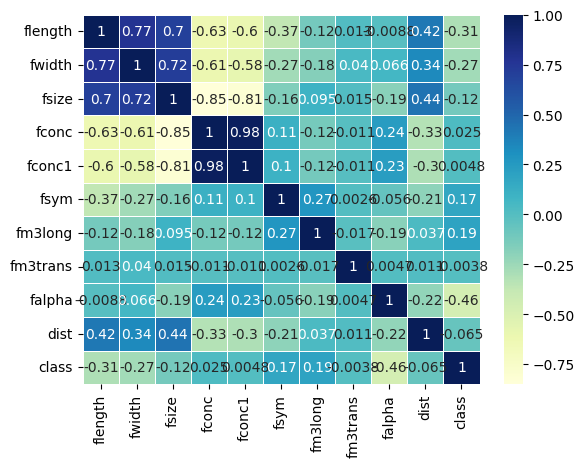

In [16]:
sns.heatmap(dff.corr(),linewidths=0.5,annot=True, cmap='YlGnBu')

In [17]:
X = dff.drop('class', axis =1)
y=dff['class']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# feature engineering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

In [30]:
model = Sequential()

model.add(Dense(16, input_shape=(10,), activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5)

In [32]:
model.fit(X_train, y_train, batch_size=12, epochs=100, 
          validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/100
1110/1110 [==============================] - 2s 2ms/step - loss: 0.4685 - accuracy: 0.7815 - val_loss: 0.3973 - val_accuracy: 0.8211
Epoch 2/100
1110/1110 [==============================] - 2s 1ms/step - loss: 0.3723 - accuracy: 0.8405 - val_loss: 0.3629 - val_accuracy: 0.8398
Epoch 3/100
1110/1110 [==============================] - 1s 1ms/step - loss: 0.3482 - accuracy: 0.8559 - val_loss: 0.3430 - val_accuracy: 0.8551
Epoch 4/100
1110/1110 [==============================] - 2s 1ms/step - loss: 0.3386 - accuracy: 0.8581 - val_loss: 0.3362 - val_accuracy: 0.8601
Epoch 5/100
1110/1110 [==============================] - 1s 1ms/step - loss: 0.3331 - accuracy: 0.8616 - val_loss: 0.3355 - val_accuracy: 0.8556
Epoch 6/100
1110/1110 [==============================] - 1s 1ms/step - loss: 0.3287 - accuracy: 0.8627 - val_loss: 0.3302 - val_accuracy: 0.8594
Epoch 7/100
1110/1110 [==============================] - 2s 2ms/step - loss: 0.3247 - accuracy: 0.8647 - val_loss: 0.3281 - val_ac

In [33]:
nn_metrics = pd.DataFrame(model.history.history)
nn_metrics

,loss,accuracy,val_loss,val_accuracy
0,0.468512,0.781508,0.397330,0.821066
1,0.372340,0.840469,0.362912,0.839818
2,0.348157,0.855941,0.343017,0.855065
3,0.338615,0.858119,0.336170,0.860147
4,0.333112,0.861649,0.335520,0.855591
5,0.328701,0.862701,0.330246,0.859446
6,0.324711,0.864729,0.328078,0.863828
7,0.321999,0.865705,0.323521,0.867333
8,0.318905,0.865405,0.324122,0.865405
9,0.317415,0.867433,0.318695,0.865230


<AxesSubplot:>

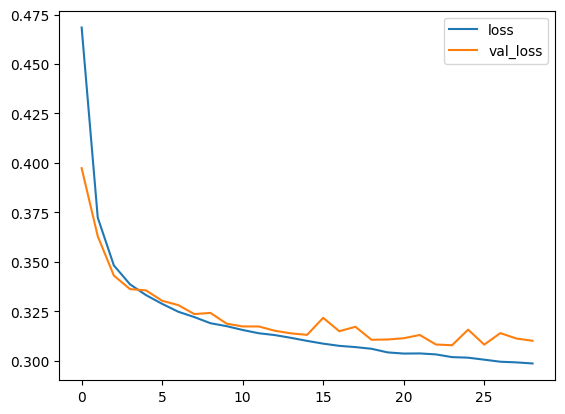

In [34]:
#Evaluating Loss
nn_metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

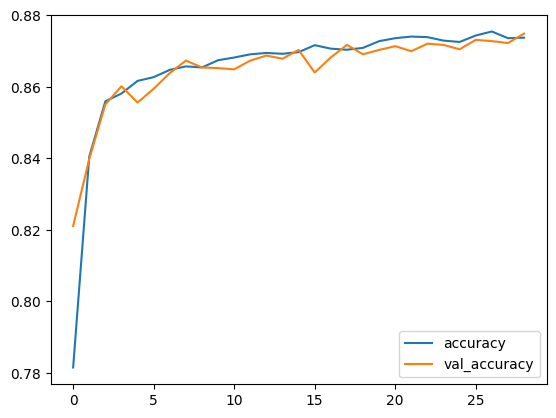

In [35]:
# Evaluating Accuracy
nn_metrics[['accuracy', 'val_accuracy']].plot()

In [36]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      2017
           1       0.87      0.95      0.91      3689

    accuracy                           0.87      5706
   macro avg       0.88      0.84      0.86      5706
weighted avg       0.88      0.87      0.87      5706



In [39]:
accuracy_score(y_test, predictions)

0.8748685594111462

In [40]:
f1_score(y_test, predictions)

0.9078471863706763

Accuracy 87.48% and F-1 Score 90.78 %

HPT

In [41]:
def create_model(neurons, dropout_rate, optimizer='adam'):

	model = Sequential()
	model.add(Dense(neurons, input_shape=(10,), activation='relu'))
	model.add(Dropout(dropout_rate))
	model.add(Dense(1, activation='sigmoid'))
 
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model

In [42]:
optimizer = ['SGD', 'RMSprop', 'Adam']
dropout_rate = [0.2, 0.3, 0.4, 0.5]
neurons = [15, 20, 25, 30]

param_grid = dict(model__optimizer=optimizer, model__dropout_rate=dropout_rate, 
                  model__neurons=neurons)

In [43]:
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))